**Fourth meeting requests**

**Visualization of Health States Proportions**

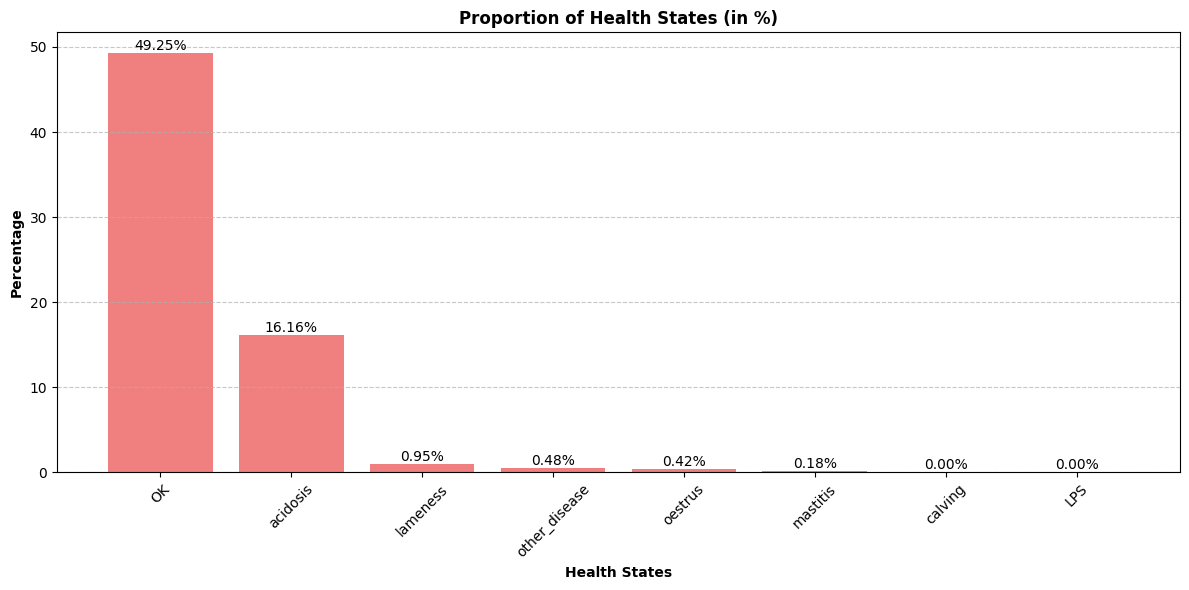

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset2-1.csv")

health_states = ['oestrus', 'calving', 'lameness', 'mastitis', 'LPS',
                 'acidosis', 'other_disease', 'OK']

df_health = df[health_states]

health_counts = df_health.sum().sort_values(ascending=False)
total = len(df)
health_percent = (health_counts / total) * 100

plt.figure(figsize=(12, 6))
bars = plt.bar(health_percent.index, health_percent.values, color='lightcoral')

# Formatting: 2 decimal places
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',  # .2f = 2 decimal places
             ha='center', va='bottom')

plt.title('Proportion of Health States (in %)', fontweight='bold')
plt.xlabel('Health States', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


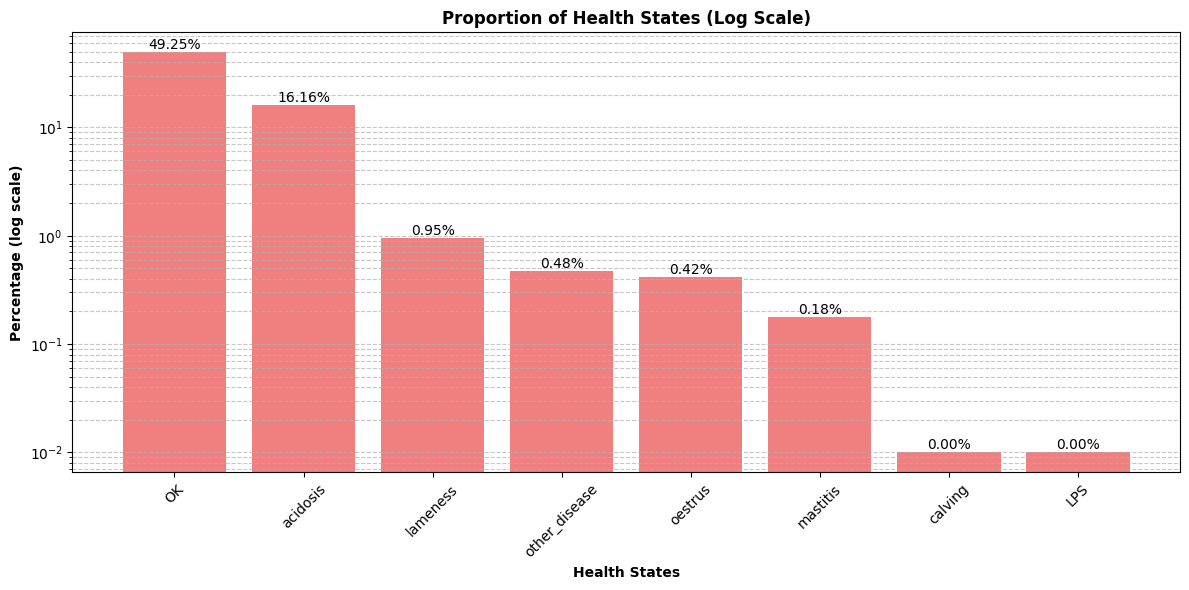

In [ ]:

health_counts = df_health.sum().sort_values(ascending=False)
total = len(df)
health_percent = (health_counts / total) * 100

safe_health_percent = health_percent.copy()
safe_health_percent[safe_health_percent == 0] = 0.01

plt.figure(figsize=(12, 6))
bars = plt.bar(safe_health_percent.index, safe_health_percent.values, color='lightcoral')

for i, bar in enumerate(bars):
    original = health_percent.values[i]
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
             f'{original:.2f}%', ha='center', va='bottom')

plt.yscale('log')
plt.title('Proportion of Health States (Log Scale)', fontweight='bold')
plt.xlabel('Health States', fontweight='bold')
plt.ylabel('Percentage (log scale)', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7, which='both')
plt.tight_layout()
plt.show()


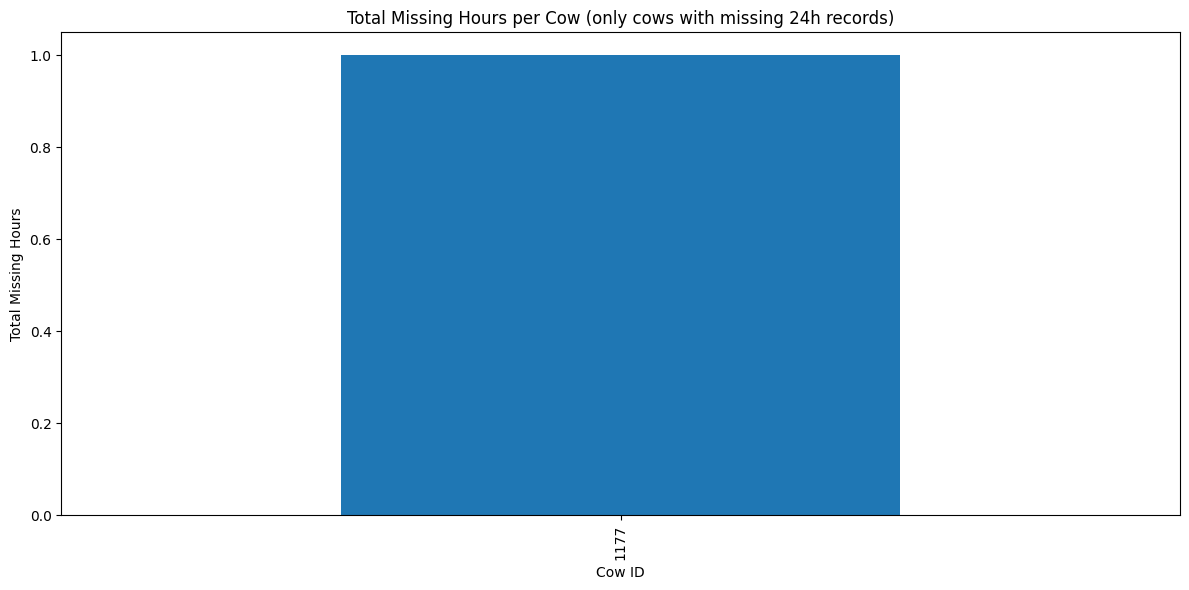

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("dataset2-1.csv")

# Ensure the datetime column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Count the number of observations (rows) per cow per day
obs_counts = df.groupby(['cow', 'date']).size().reset_index(name='hour_count')

# Identify rows with missing hours (less than 24)
missing_obs = obs_counts[obs_counts['hour_count'] < 24]

# Create a plot showing missing hour count per cow
plt.figure(figsize=(12, 6))
missing_obs.groupby('cow')['hour_count'].apply(lambda x: (24 - x).sum()).sort_values(ascending=False).plot(kind='bar')
plt.title("Total Missing Hours per Cow (only cows with missing 24h records)")
plt.xlabel("Cow ID")
plt.ylabel("Total Missing Hours")
plt.tight_layout()
plt.show()


Investigate the correlation between the "OK" label and other health states.


Check if, in the dataset, when a cow is labeled as OK, there is any other health label equal to 1.


In [ ]:
import pandas as pd


file_path = "dataset2-1.csv"
df = pd.read_csv(file_path)

# Define the health-related columns excluding "OK"
health_labels = [
    'oestrus', 'calving', 'lameness', 'mastitis', 'LPS',
    'acidosis', 'other_disease', 'accidents', 'disturbance',
    'mixing', 'management_changes'
]

# Compute the correlation between 'OK' and each health state
correlations = df[health_labels + ['OK']].corr()['OK'].drop('OK')

# Identify rows where 'OK' == 1 and any other health state == 1 (overlap check)
ok_and_pathology_overlap = df[(df['OK'] == 1) & (df[health_labels].sum(axis=1) > 0)]



print(correlations)
print(ok_and_pathology_overlap)


oestrus              -0.063784
calving                    NaN
lameness             -0.096693
mastitis             -0.041706
LPS                        NaN
acidosis             -0.432526
other_disease        -0.068208
accidents                  NaN
disturbance          -0.804610
mixing                     NaN
management_changes   -0.010908
Name: OK, dtype: float64
        cow        date  hour  IN_ALLEYS      REST       EAT  ACTIVITY_LEVEL  \
600    7163  2015-03-27     1    114.055  3485.944     0.000      -783.51832   
601    7163  2015-03-27     2     41.395  3558.604     0.000      -811.85572   
602    7163  2015-03-27     3      0.000  3599.999     0.000      -827.99977   
603    7163  2015-03-27     4     52.625  3547.374     0.000      -807.47602   
604    7163  2015-03-27     5     78.736  3521.263     0.000      -797.29273   
...     ...         ...   ...        ...       ...       ...             ...   
38058  2603  2015-03-30    20    405.008  3166.022    28.969      -651.216

**4. Data Preprocessing**
Step 1: Perform initial cleaning by keeping only physiological classes:


Retain: mastitis, lameness, oestrus, OK, calving, other_diseases.


Remove: management changes, mixing, disturbance, accidents, LPS, acidosis.

In [ ]:
# Step 1: Retain only relevant physiological health state columns
physiological_labels = ['mastitis', 'lameness', 'oestrus', 'OK', 'calving', 'other_disease']

# Keep essential columns: identifiers + activity data + physiological labels
columns_to_keep = ['cow', 'date', 'hour', 'IN_ALLEYS', 'REST', 'EAT', 'ACTIVITY_LEVEL'] + physiological_labels

# Apply column filtering
df_preprocessed = df[columns_to_keep]
# Save the preprocessed dataset to CSV
df_preprocessed.to_csv(r"preprocessed_physiological_only.csv", index=False)


**3. Data Cleaning**



Filter cows:


Eliminate cows with between 12 and 18 recorded entries (to be handled separately).


Retain cows with more than 18 records for further analysis.


In [ ]:

df_cleaned =df_preprocessed

# Convert date column to datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Count number of hourly observations per cow per day
hourly_counts = df_cleaned.groupby(['cow', 'date']).size().reset_index(name='hour_count')

# Identify 24h records by observation count
records_more_than_18_obs = hourly_counts[hourly_counts['hour_count'] > 18]
records_12_to_18_obs = hourly_counts[(hourly_counts['hour_count'] >= 12) & (hourly_counts['hour_count'] < 18)]
records_less_than_12_obs = hourly_counts[hourly_counts['hour_count'] < 12]

# Merge to filter full rows from original dataframe
df_more_than_18_obs = df_cleaned.merge(records_more_than_18_obs[['cow', 'date']], on=['cow', 'date'])
df_12_to_18_obs = df_cleaned.merge(records_12_to_18_obs[['cow', 'date']], on=['cow', 'date'])
df_less_than_12_obs = df_cleaned.merge(records_less_than_12_obs[['cow', 'date']], on=['cow', 'date'])

# Drop the records with less than 12 observations from the main dataset
df_filtered = df_cleaned[~df_cleaned.set_index(['cow', 'date']).index.isin(df_less_than_12_obs.set_index(['cow', 'date']).index)]

# Print dataset shapes
print("Original dataset shape:", df.shape)
print("After filtering (<12 obs removed):", df_filtered.shape)
print("Deleted rows (<12 obs):", df_less_than_12_obs.shape)
print("Filtered dataset (>18 obs):", df_more_than_18_obs.shape)
print("Filtered dataset (12–18 obs):", df_12_to_18_obs.shape)

# Save datasets
df_more_than_18_obs.to_csv(r"filtered_dataset_more_than_18_obs.csv", index=False)
df_12_to_18_obs.to_csv(r"filtered_dataset_12_to_18_obs.csv", index=False)
df_filtered.to_csv(r"filtered_dataset_no_less_than_12_obs.csv", index=False)


C:\Users\ayagr\AppData\Local\Temp\ipykernel_6568\1429587185.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])


Original dataset shape: (40247, 19)
After filtering (<12 obs removed): (40247, 13)
Deleted rows (<12 obs): (0, 13)
Filtered dataset (>18 obs): (40247, 13)
Filtered dataset (12–18 obs): (0, 13)


In [ ]:
# Count number of unique (cow, date) pairs and unique cows for df_more_than_18_days
num_days_more_than_18 = df_more_than_18_obs[['cow', 'date']].drop_duplicates().shape[0]
num_cows_more_than_18 = df_more_than_18_obs['cow'].nunique()

# Count number of unique (cow, date) pairs and unique cows for df_12_to_18_days
num_days_12_to_18 = df_12_to_18_obs[['cow', 'date']].drop_duplicates().shape[0]
num_cows_12_to_18 = df_12_to_18_obs['cow'].nunique()

# Print results
print("More than 18 days:")
print(f"Number of unique days: {num_days_more_than_18}")
print(f"Number of unique cows: {num_cows_more_than_18}")

print("\n12 to 18 days:")
print(f"Number of unique days: {num_days_12_to_18}")
print(f"Number of unique cows: {num_cows_12_to_18}")


More than 18 days:
Number of unique days: 1677
Number of unique cows: 28

12 to 18 days:
Number of unique days: 0
Number of unique cows: 0


**Analysis of Cows with Multiple Diseases**

In [ ]:
maladie_cols = ['oestrus', 'calving', 'lameness', 'mastitis', 'other_disease']

df_non_ok = df.copy()

df_non_ok['nb_maladies'] = df_non_ok[maladie_cols].sum(axis=1)

# Keep only rows with more than one disease
multi_maladie = df_non_ok[df_non_ok['nb_maladies'] > 1].copy()

# Extract the names of the diseases present
def get_maladies_presentes(row):
    return [col for col in maladie_cols if row[col] == 1]

multi_maladie['maladies_presentes'] = multi_maladie.apply(get_maladies_presentes, axis=1)

# Display results
print(f"Number of cases with multiple diseases: {len(multi_maladie)}")
print(multi_maladie[['cow', 'date', 'hour', 'maladies_presentes']])


Number of cases with multiple diseases: 0
Empty DataFrame
Columns: [cow, date, hour, maladies_presentes]
Index: []


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"filtered_dataset_more_than_18_obs.csv")



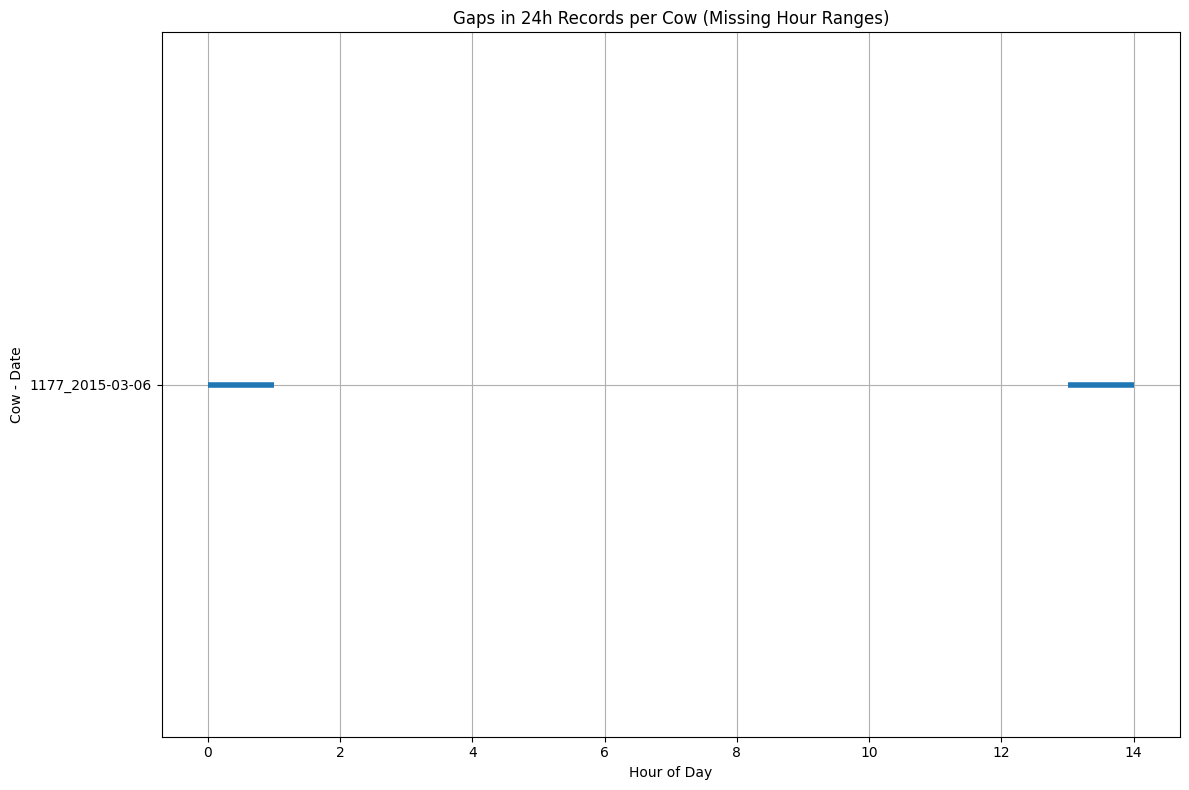

In [ ]:

# Ensure correct types
df['hour'] = df['hour'].astype(int)
df['date'] = pd.to_datetime(df['date'])

# Identify full range of hours
full_hours = list(range(24))

# Keep only cows that have missing hours
hour_counts = df.groupby(['cow', 'date'])['hour'].nunique().reset_index(name='hour_count')
incomplete_days = hour_counts[hour_counts['hour_count'] < 24]
df_incomplete = df.merge(incomplete_days[['cow', 'date']], on=['cow', 'date'])

# Build gap data
gap_data = []
for (cow, date), group in df_incomplete.groupby(['cow', 'date']):
    observed_hours = sorted(group['hour'].unique())
    missing_hours = sorted(set(full_hours) - set(observed_hours))
    gaps = []
    if missing_hours:
        start = missing_hours[0]
        for i in range(1, len(missing_hours)):
            if missing_hours[i] != missing_hours[i-1] + 1:
                gaps.append((start, missing_hours[i-1]))
                start = missing_hours[i]
        gaps.append((start, missing_hours[-1]))
        for g_start, g_end in gaps:
            gap_data.append({
                'cow': cow,
                'date': date,
                'start_hour': g_start,
                'end_hour': g_end
            })

gap_df = pd.DataFrame(gap_data)

# Plot gaps
plt.figure(figsize=(12, 8))
for cow in gap_df['cow'].unique():
    cow_data = gap_df[gap_df['cow'] == cow]
    for i, row in cow_data.iterrows():
        plt.hlines(y=f"{row['cow']}_{row['date'].date()}", xmin=row['start_hour'], xmax=row['end_hour']+1, linewidth=4)

plt.xlabel('Hour of Day')
plt.ylabel('Cow - Date')
plt.title('Gaps in 24h Records per Cow (Missing Hour Ranges)')
plt.grid(True)
plt.tight_layout()
plt.show()
